### Assumptions in K-Means clustering:

The k means algorithm makes several assumptions about the data that are important to understand. While it often still “works” if you ignore them, you’ll see far better results if you transform the data to work within its assumptions.

* Equal variance: K-means assumes that variables have the same variance. The mean and standard deviation of the values should be similar. If they’re not, you’ll need to scale and standardise the variables.
* Normal distribution: K-means expects the distribution of each variable to be normal, not highly skewed. If it’s skewed, you’ll need to transform it first using a log transform, Box Cox, or similar.
* Similarly sized spherical clusters: It also expects data to form spherical clusters of roughly similar size. If your data aren’t distributed in this way, you may need a different algorithm


In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Let's import the data
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
#Getting the correlation matrix for the features Age, Annual income and Spending score
feature_df = df.drop(['Gender'],axis= 1)
feature_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


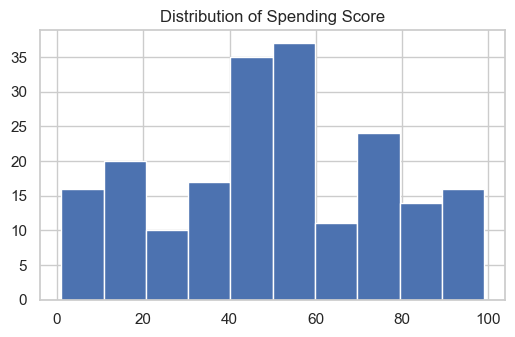

In [19]:
#Checking for each features distribution
#Spending score
plt.figure(figsize= (6,3.5))
plt.hist(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.show()

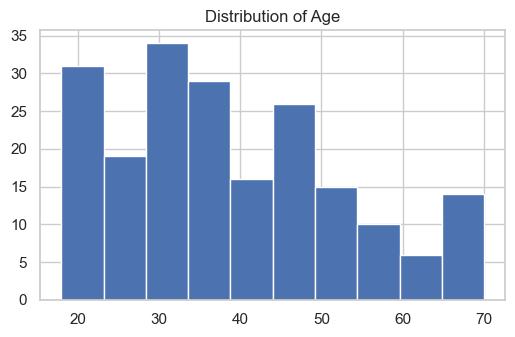

In [20]:
#Age
plt.figure(figsize= (6,3.5))
plt.hist(df['Age'])
plt.title('Distribution of Age')
plt.show()

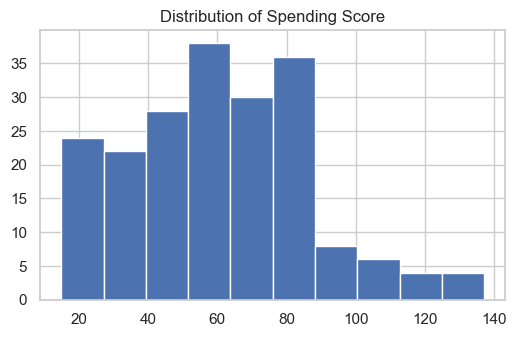

In [21]:
#Spending annual income
plt.figure(figsize= (6,3.5))
plt.hist(df['Annual Income (k$)'])
plt.title('Distribution of Spending Score')
plt.show()

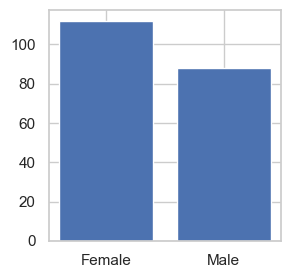

In [28]:
gender_dis = df['Gender'].value_counts().reset_index()
plt.figure(figsize=(3,3))
plt.bar(gender_dis['Gender'], gender_dis['count'])
plt.show()